#Spam Mails Detection Using Naive Bayes Algorithms

**Loading the Data**

In [ ]:
https://www.kaggle.com/venky73/spam-mails-dataset

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [2]:
dataSet = pd.read_csv('/content/drive/My Drive/data/spam_ham_dataset.csv')

In [3]:
# print out some data
print('Data shape (rows, cols): ', dataSet.shape)
dataSet.head(10)

Data shape (rows, cols):  (5171, 4)


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [4]:
dataSet.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [5]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
spam = dataSet[dataSet['label'] == 'spam'].shape[0]
ham = dataSet[dataSet['label'] == 'ham'].shape[0]

Spam:		 1499
Ham:		 3672
Spam Percentage: 0.2898859021465867



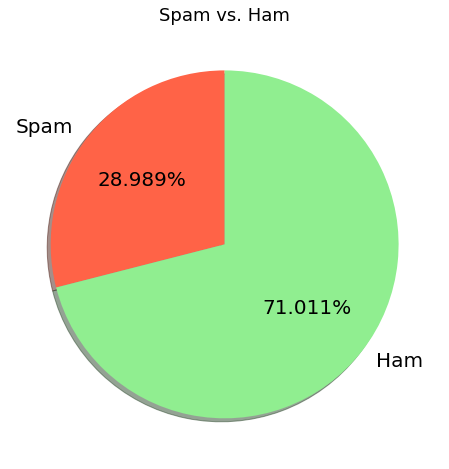

In [10]:
spam_percentage = spam / (spam + ham)


print('Spam:\t\t', spam)
print('Ham:\t\t', ham)
print('Spam Percentage:', spam_percentage, end='\n\n')

plt.figure(figsize=(12, 8))
font = {'weight': 'normal','size': 20}
plt.rc('font', **font)
plt.title('Spam vs. Ham', size=18)
plt.pie([spam, ham], labels=['Spam', 'Ham'], colors=['tomato', 'lightgreen'], autopct='%1.3f%%', shadow=True, startangle=90)
plt.show()

In [14]:
dataSet = dataSet[['text', 'label_num']]
dataSet.rename(columns={"label_num": "class"}, inplace=True)
dataSet.head(10)

,text,class
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
5,Subject: ehronline web address change\r\nthis ...,0
6,Subject: spring savings certificate - take 30 ...,0
7,Subject: looking for medication ? we ` re the ...,1
8,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,"Subject: nominations for oct . 21 - 23 , 2000\...",0


**Importing NLTK Library**

In [15]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
n =  dataSet.shape[0]
corpus = []
ps = PorterStemmer()

for i in range(n):
    text = re.sub('[^a-zA-Z]', ' ', dataSet['text'][i].lower())
    text = text.split()  # Spliting text into words
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]  # Removing stopwords & # stemming
    text = ' '.join(text)  #Joining text
    corpus.append(text)

**Features Extraction**

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = dataSet.iloc[:, -1].values

In [45]:
cv.vocabulary_

{'subject': 31907,
 'enron': 11246,
 'methanol': 21625,
 'meter': 21621,
 'follow': 12903,
 'note': 23557,
 'gave': 13674,
 'monday': 22222,
 'preliminari': 26428,
 'flow': 12806,
 'data': 8590,
 'provid': 26787,
 'daren': 8539,
 'pleas': 25912,
 'overrid': 24609,
 'pop': 26144,
 'daili': 8456,
 'volum': 35551,
 'present': 26469,
 'zero': 37626,
 'reflect': 27948,
 'activ': 308,
 'obtain': 23851,
 'ga': 13482,
 'control': 7458,
 'chang': 5954,
 'need': 23026,
 'asap': 1978,
 'econom': 10607,
 'purpos': 26982,
 'hpl': 16050,
 'nom': 23453,
 'januari': 17757,
 'see': 29771,
 'attach': 2193,
 'file': 12528,
 'hplnol': 16057,
 'xl': 37001,
 'neon': 23073,
 'retreat': 28314,
 'ho': 15765,
 'around': 1907,
 'wonder': 36527,
 'time': 33239,
 'year': 37255,
 'leader': 19563,
 'know': 18951,
 'extrem': 11994,
 'hectic': 15333,
 'tough': 33546,
 'think': 33051,
 'anyth': 1551,
 'past': 24988,
 'holiday': 15808,
 'life': 19850,
 'go': 14238,
 'week': 36001,
 'decemb': 8793,
 'like': 19885,
 'minu

**Splitting the dataset into the Training set and Test set**

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

##Training The Model Using GaussianNB

In [101]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy:	0.9535962877030162
Precision:	0.9479768786127167
Recall:		0.8864864864864865




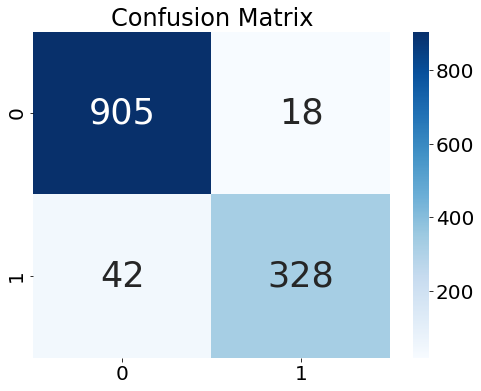

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
print('Precision:', precision_score(y_test, y_pred), sep='\t')
print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
print('\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
plt.show()

##Training The Model Using BernoulliNB

In [103]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy:	0.8476411446249034
Precision:	0.9219512195121952
Recall:		0.5108108108108108




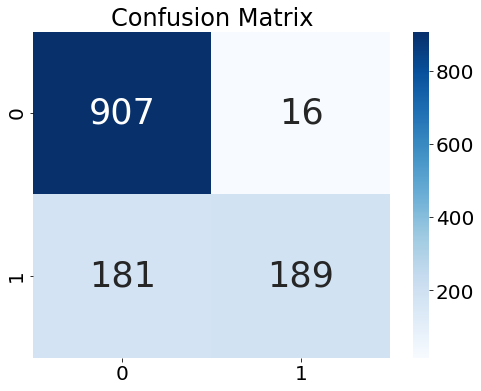

In [104]:
cm = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
print('Precision:', precision_score(y_test, y_pred), sep='\t')
print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
print('\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
plt.show()

##Training The Model Using ComplementNB

In [105]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy:	0.9775715390564579
Precision:	0.9571045576407506
Recall:		0.9648648648648649




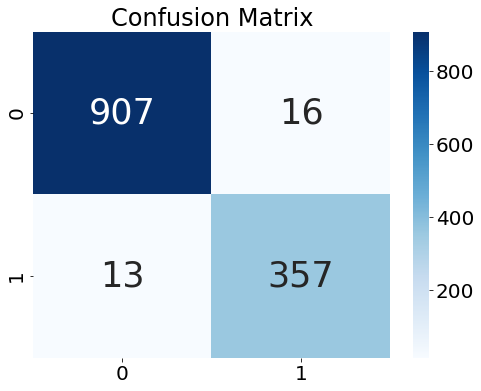

In [106]:
cm = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
print('Precision:', precision_score(y_test, y_pred), sep='\t')
print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
print('\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
plt.show()

##Training The Model Using MultinomialNB

In [107]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy:	0.9775715390564579
Precision:	0.962059620596206
Recall:		0.9594594594594594




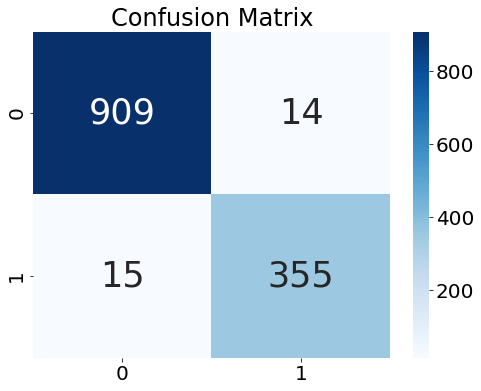

In [108]:
cm = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
print('Precision:', precision_score(y_test, y_pred), sep='\t')
print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
print('\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
plt.show()